In [19]:
#load data

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
x = boston.data
y = boston.target
col = boston.feature_names
print(x.shape)
print(y.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
(506,)


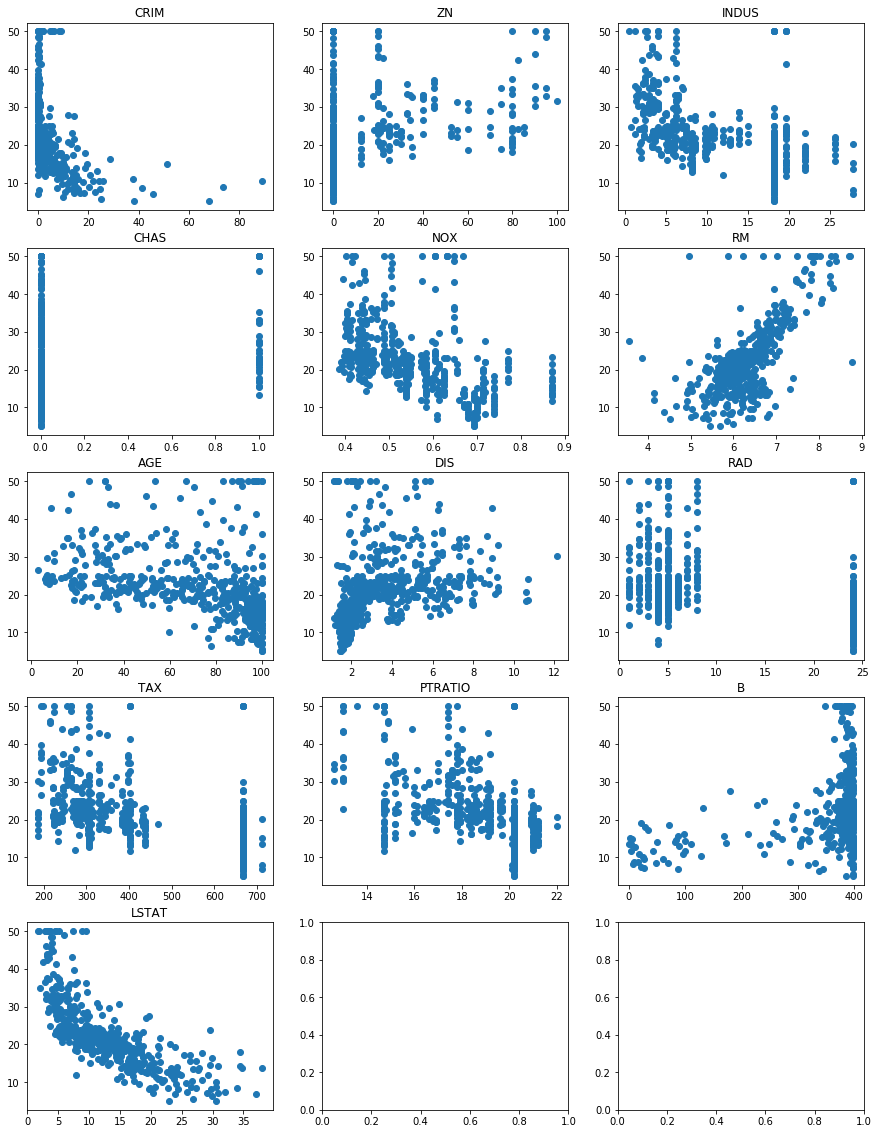

In [20]:
#Correlation of each independent variable and dependent variable

import matplotlib.pyplot as plt
fig,axes = plt.subplots(5,3,figsize=(15,20))
for i, ax in enumerate(axes.ravel()):
    if i<x.shape[1]:
        ax.scatter(x[:,i],y)
        ax.set_title(col[i])
plt.show()

In [21]:
#Split dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [22]:
#Simple Linear Regression('RM')

idx = list(col).index('RM')
x_train_rm = x_train[:,idx].reshape((-1,1))
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train_rm,y_train)
print(lr.fit)
print('coef_ : {} \nintercept_ : {} \nR2 score for train set is {}'.format(lr.coef_,lr.intercept_,lr.score(x_train_rm,y_train)))

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
coef_ : [9.79620171] 
intercept_ : -38.907661826429305 
R2 score for train set is 0.5608802132974211


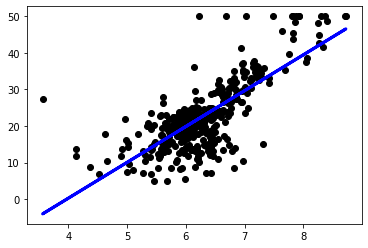

In [23]:
#Analysis accuracy : train set

y_predict = lr.predict(x_train_rm)
plt.scatter(x_train_rm,y_train,color='black')
plt.plot(x_train_rm,y_predict,color='blue',lw=3)
plt.show()


In [24]:
#Test set 

x_test_rm = x_test[:,idx].reshape((-1,1))
print('R2 score for test set is ',lr.score(x_test_rm,y_test))

R2 score for test set is  0.14443708697515467


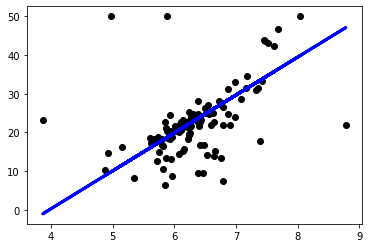

In [25]:
#Analysis accuracy : test set

y_predict = lr.predict(x_test_rm)
plt.scatter(x_test_rm,y_test,color='black')
plt.plot(x_test_rm,y_predict,color='blue',lw=3)
plt.show()

In [26]:
#Multiple Linear Regression

lr.fit(x_train,y_train)
print(lr.fit)
print('coef_ : {} \nintercept : {} \n R2 score for train test is {} : '.format(lr.coef_,lr.intercept_,lr.score(x_train,y_train)))

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
coef_ : [-1.24649091e-01  3.04735052e-02  2.17990089e-02  2.79225761e+00
 -1.52135247e+01  5.27249266e+00 -1.10577742e-02 -1.27320872e+00
  2.65804711e-01 -1.15043029e-02 -9.19571148e-01  1.01624292e-02
 -3.89712044e-01] 
intercept : 23.554245467591425 
 R2 score for train test is 0.7698532963729757 : 


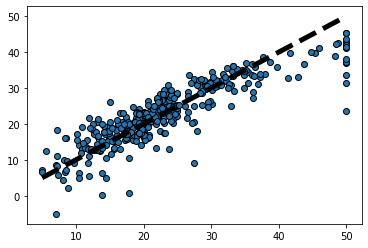

In [27]:
#Analysis accuracy

predicted = lr.predict(x_train)
plt.scatter(y_train,predicted,edgecolors=(0,0,0))
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=5)
plt.show()

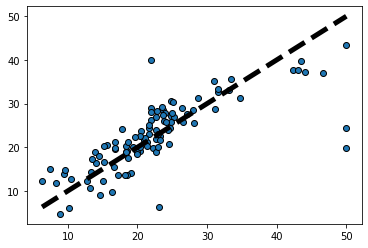

R2 score for test set is 0.5785415472763431


In [28]:
#Test set
predicted = lr.predict(x_test)
plt.scatter(y_test,predicted,edgecolors=(0,0,0))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=5)
plt.show()
print('R2 score for test set is',lr.score(x_test,y_test))

In [29]:
#Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
print(scaler)
print('mean_ : {}\nvarience : {}'.format(scaler.mean_,scaler.var_))
scaled_x_train = scaler.transform(x_train)
scaled_x_test  = scaler.transform(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)
mean_ : [3.40301918e+00 1.13886139e+01 1.10690099e+01 6.93069307e-02
 5.51701980e-01 6.27081683e+00 6.83544554e+01 3.81904455e+00
 9.09158416e+00 4.01945545e+02 1.83868812e+01 3.59049653e+02
 1.27629455e+01]
varience : [6.72975672e+01 5.46459128e+02 4.89588505e+01 6.45034801e-02
 1.33191549e-02 4.98727184e-01 8.00078124e+02 4.54208095e+00
 7.22020084e+01 2.76100812e+04 4.69574374e+00 7.58004037e+03
 5.28223663e+01]


In [30]:
lr.fit(scaled_x_train,y_train)
print('R2 score for scaled train set is {:.3f}'.format(lr.score(scaled_x_train,y_train)))
print('R2 score for scaled test set is {:.3f}'.format(lr.score(scaled_x_test,y_test)))

R2 score for scaled train set is 0.770
R2 score for scaled test set is 0.579


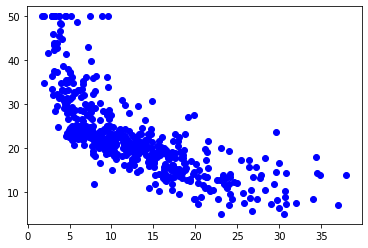

In [36]:
#Curve fitting with Polynomial

plt.plot(x[:,-1],y,'bo')
plt.show()

In [31]:
#Polynomial features

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
print('x_train vs x_train_poly : {} vs {}'.format(x_train.shape,x_train_poly.shape))

x_train vs x_train_poly : (404, 13) vs (404, 105)


In [32]:
#Overfitting

lr = LinearRegression().fit(x_train_poly,y_train)
print('R2 score for polynomial train set is ',lr.score(x_train_poly,y_train))
print('R2 score for polynomial test set is ',lr.score(x_test_poly,y_test))

R2 score for polynomial train set is  0.9336239312570125
R2 score for polynomial test set is  0.6170018546178697


In [33]:
#Ridge Regression

from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train_poly,y_train)
print('Ridge R2 score for polynomial train set is ',ridge.score(x_train_poly,y_train))
print('Ridge R2 score for polynomial test set is ',ridge.score(x_test_poly,y_test))

Ridge R2 score for polynomial train set is  0.9304680344196381
Ridge R2 score for polynomial test set is  0.7240028637765525
